In [2]:
import os 
os.chdir("..")

from make_dataset import make_mnist_dataset

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

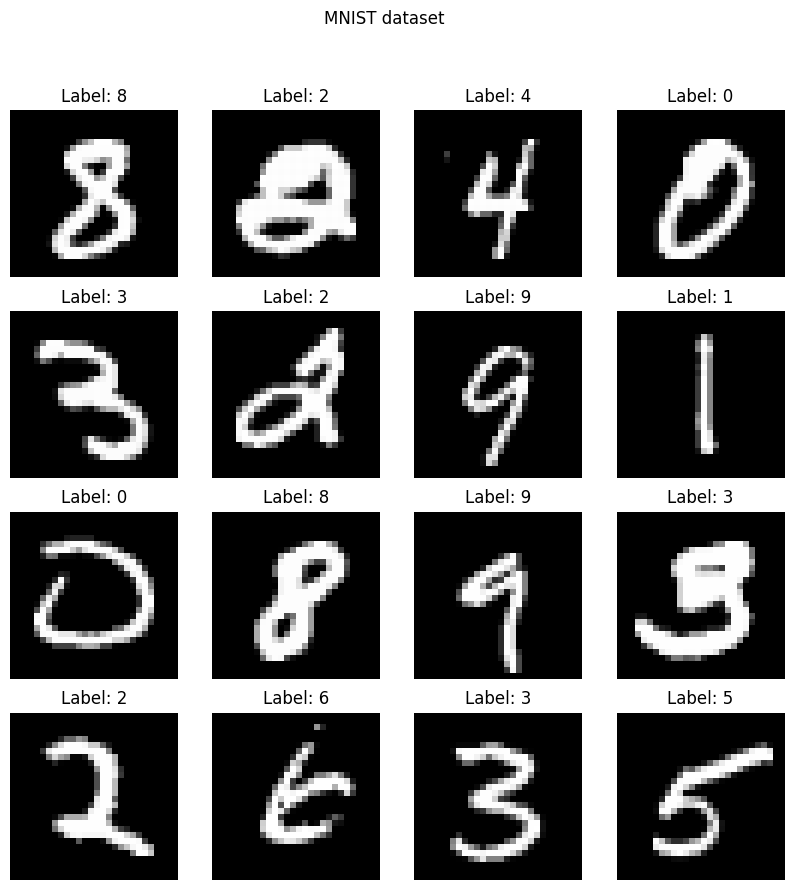

In [6]:
# Plot 16 random images from the dataset
def plot_images(images, labels, title):
    images = images.reshape(-1, 28, 28)
    fig, axs = plt.subplots(4, 4, figsize=(10, 10))
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(images[i * 4 + j], cmap="gray")
            axs[i, j].axis("off")
            axs[i, j].set_title(f"Label: {labels[i * 4 + j]}")
    plt.suptitle(title)
    plt.show()

# Load the dataset
X, y = make_mnist_dataset()
X = X.numpy()
y = y.numpy()

idx = np.random.choice(len(X), 16, replace=False)
# Plot 16 random images from the dataset
plot_images(X[idx], y[idx], "MNIST dataset")


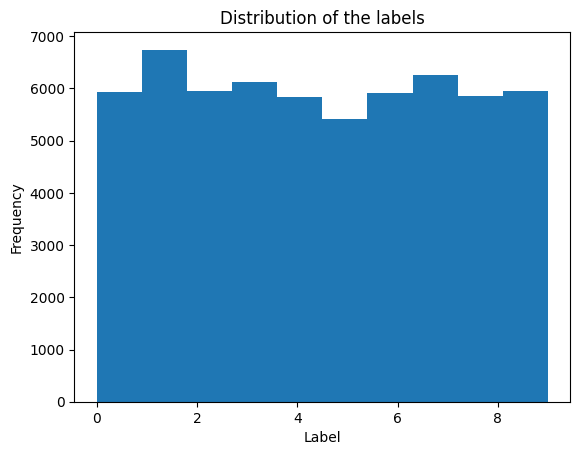

In [7]:
# Plot the distribution of the labels
plt.hist(y, bins=10)
plt.title("Distribution of the labels")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()


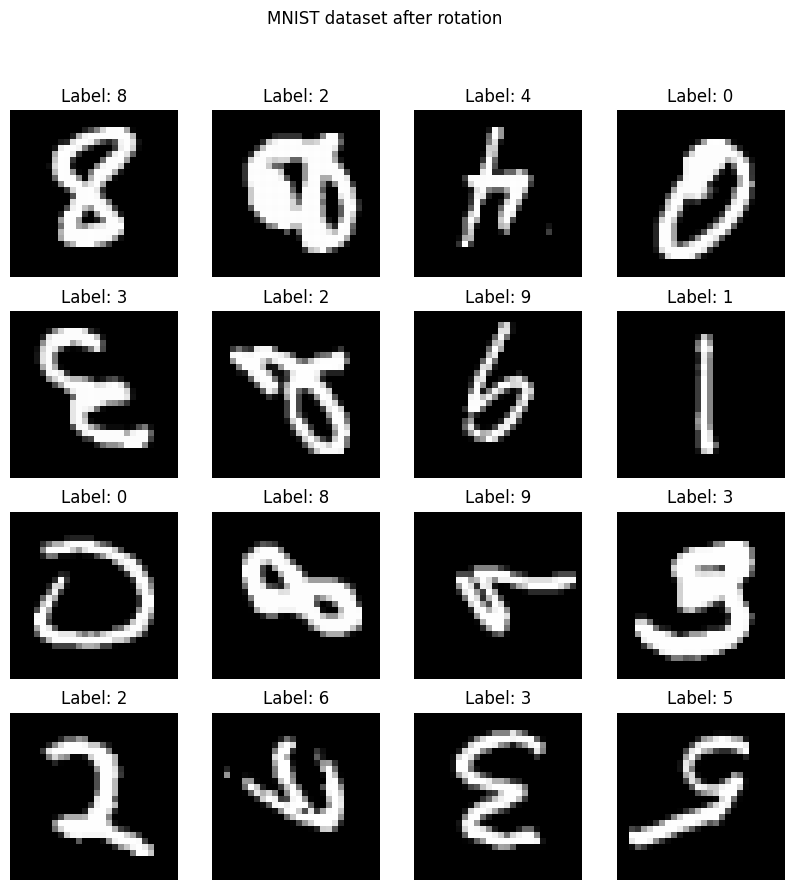

In [10]:
# Rotate images by a random multiplication of 90 degrees
k = np.random.randint(0, 3, size=len(X))
for i in range(len(X)):
    X[i] = np.rot90(X[i], k=k[i], axes=(1,2))

# Plot 16 random images from the dataset
plot_images(X[idx], y[idx], "MNIST dataset after rotation")
